# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop("MEDV", axis = 1)
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train:.2f}")
print(f"R2 score on testing set: {r2_test:.2f}")

R2 score on training set: 0.75
R2 score on testing set: 0.67


## 4. Calculate and print mean squared error for both the training and the testing set.

In [13]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on training set: {mse_train:.2f}")
print(f"MSE on testing set: {mse_test:.2f}")

MSE on training set: 21.64
MSE on testing set: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [14]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE on training set: {mae_train:.2f}")
print(f"MAE on testing set: {mae_test:.2f}")


MAE on training set: 3.31
MAE on testing set: 3.19


## Classification Model Evaluation

In [15]:
from sklearn.datasets import load_iris
data = load_iris()

In [16]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
column_names = data.feature_names

In [18]:
df = pd.DataFrame(data['data'],columns=column_names)

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
target = pd.DataFrame(data.target)

In [21]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [25]:
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))


Accuracy score on training set:  0.975
Accuracy score on testing set:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [28]:
from sklearn.metrics import balanced_accuracy_score
print("BLS on training set: ", balanced_accuracy_score(y_train, y_train_pred))
print("BLS on testing set: ", balanced_accuracy_score(y_test, y_test_pred))


BLS on training set:  0.975609756097561
BLS on testing set:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [29]:
from sklearn.metrics import precision_score
print("Precision score on training set: ", precision_score(y_train, y_train_pred, average='weighted'))
print("Precision score on testing set: ", precision_score(y_test, y_test_pred, average='weighted'))


Precision score on training set:  0.9767857142857144
Precision score on testing set:  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [30]:
from sklearn.metrics import recall_score
print("Recall score on training set: ", recall_score(y_train, y_train_pred, average='weighted'))
print("Recall score on testing set: ", recall_score(y_test, y_test_pred, average='weighted'))

Recall score on training set:  0.975
Recall score on testing set:  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [31]:
from sklearn.metrics import f1_score
print("F1 score on training set: ", f1_score(y_train, y_train_pred, average='weighted'))
print("F1 score on testing set: ", f1_score(y_test, y_test_pred, average='weighted'))

F1 score on training set:  0.9749882794186592
F1 score on testing set:  1.0


## 13. Generate confusion matrices for both the training and the testing set.

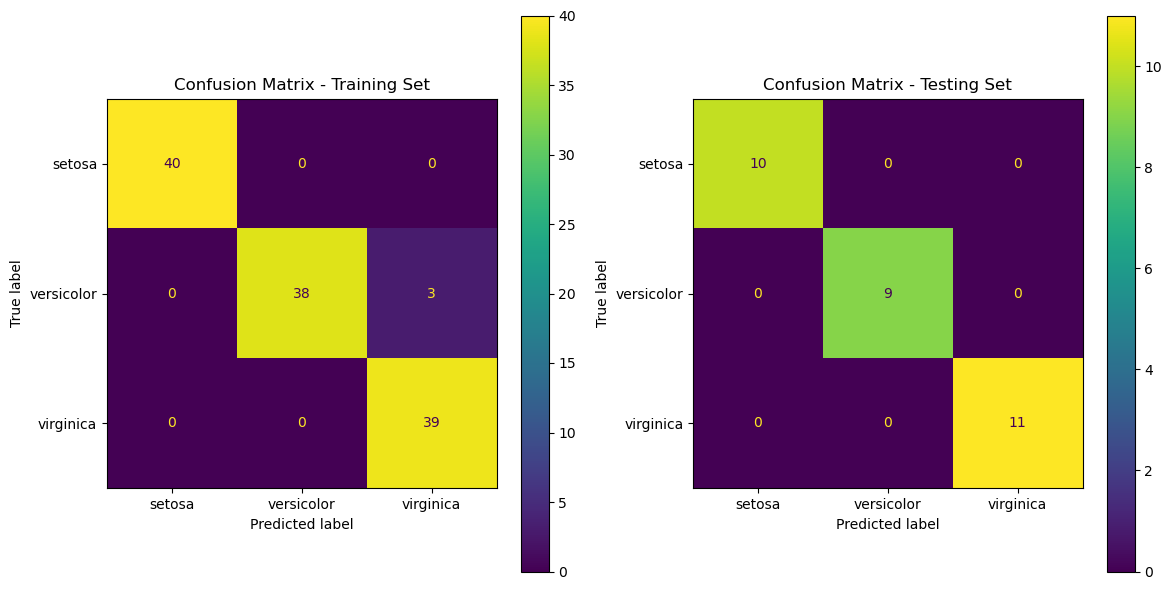

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=iris.target_names).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=iris.target_names).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix - Testing Set')
plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(cv=5, max_iter=200)
model_cv.fit(X_train, y_train)
y_train_pred_cv = model_cv.predict(X_train)
y_test_pred_cv = model_cv.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy score on training set with CV: ", accuracy_score(y_train, y_train_pred_cv))
print("Accuracy score on testing set with CV: ", accuracy_score(y_test, y_test_pred_cv))

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy score on training set with KNN: ", accuracy_score(y_train, y_train_pred_knn))
print("Accuracy score on testing set with KNN: ", accuracy_score(y_test, y_test_pred_knn))

from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_train_pred_svc = svc_model.predict(X_train)
y_test_pred_svc = svc_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy score on training set with SVC: ", accuracy_score(y_train, y_train_pred_svc))
print("Accuracy score on testing set with SVC: ", accuracy_score(y_test, y_test_pred_svc))



Accuracy score on training set with CV:  0.9583333333333334
Accuracy score on testing set with CV:  1.0
Accuracy score on training set with KNN:  0.95
Accuracy score on testing set with KNN:  1.0
Accuracy score on training set with SVC:  0.975
Accuracy score on testing set with SVC:  1.0
